### import necessary libraries

* cv2 ( [pypi.org](https://pypi.org/project/opencv-python) )
```
pip install opencv-python
```

* matplotlib ( [pypi.org](https://pypi.org/project/matplotlib), [matplotlib.org](https://matplotlib.org/stable/users/installing.html) )
```
pip install matplotlib
```

* PIL ( [pypi.org](https://pypi.org/project/Pillow), [pillow.readthedocs.io](https://pillow.readthedocs.io/en/stable/installation.html) )
```
pip install Pillow
```

* numpy ( [pypi.org](https://pypi.org/project/numpy), [numpy.org](https://numpy.org/install) )
```
pip install numpy
```

* skimage ( [pypi.org](https://pypi.org/project/scikit-image), [scikit-image.org](https://scikit-image.org/docs/dev/install.html) )
```
pip install -U scikit-image
```

* scipy ( [pypi.org](https://pypi.org/project/scipy), [scipy.org](https://scipy.org/install) )
```
pip install scipy
```
---
### Install all packages
```bash
python -m pip install -U --user numpy scipy matplotlib ipython jupyter pandas sympy nose opencv-python Pillow scikit-image PyQt5
```

In [1]:
import cv2  
import pylab

### function for show image 

In [2]:
def ShowImage(img, title="no title", subplot=111, RGB=False):
    if type(subplot)!=tuple :
        pylab.subplot(subplot)
    else :
        pylab.subplot(*subplot)
    if RGB :
        pylab.imshow( img )
    else :
        pylab.imshow( img, cmap='gray', vmin=0, vmax=255 )
    pylab.title( title, fontweight ="bold")

### function for show draw window for ask color with tkinter module

In [3]:
import tkinter as tk     #pip install tk
from tkinter.colorchooser import askcolor
from PIL import Image,ImageTk

class MyFrame(tk.Frame):
    def __init__(self, PhotoName, master, *pargs):
        tk.Frame.__init__(self, master, *pargs)
        self.image = Image.open(PhotoName)
        self.img_copy= self.image.copy()
        self.background_image = ImageTk.PhotoImage(self.image)
        self.background = tk.Label(self, image=self.background_image)
        self.background.pack(fill=tk.BOTH, expand=tk.YES)
        self.background.bind('<Configure>', self._resize_image)

    def _resize_image(self,event):
        new_width = event.width
        new_height = event.height
        self.image = self.img_copy.resize((new_width, new_height))
        self.background_image = ImageTk.PhotoImage(self.image)
        self.background.configure(image =  self.background_image)

def getColor(PhotoName):
    """Choose color.
    Returns tuple of RBG and HEX."""
    win = None
    if not tk._default_root:
        win = tk.Tk()
        win.title('Tkinter Color Chooser')
        win.geometry('600x600')
        win.configure(background="black")
        
        e = MyFrame(PhotoName, win)
        e.pack(fill=tk.BOTH, expand=tk.YES)
    
        #win.withdraw()
        #win.after(60, win.destroy())
    color = askcolor()
    if win is not None: 
        win.destroy()
    return color

### function for change color

In [4]:
def color_change(I, w, new_color):
    %matplotlib qt
    pylab.figure(figsize=[10, 10])
    pylab.imshow(I)
    x = pylab.ginput(1) 

    column, row = map( round, x[0] )
    
    I = I.astype('float')
    img = I.copy()
    
    selected_color = I[row, column]
    print(f"image[{column},{row}]={selected_color}")
    
    r, g, b = selected_color
    
    red, green, blue = I[:,:,0], I[:,:,1], I[:,:,2]
    mask = (abs(red-r)<=w) & (abs(green-g)<=w) &(abs(blue-b)<=w)
    img[:,:,:][mask] = new_color
    
    I = I.astype('uint8')
    img = img.astype('uint8')
    
    %matplotlib inline
    pylab.figure(figsize=[20, 20])
    ShowImage(I, title="Orginal Image", subplot=121, RGB=True)
    ShowImage(img, title="edited Image", subplot=122, RGB=True)

selected color :  (255.99609375, 255.99609375, 0.0) #ffff00
image[414,674]=[227.  10.  21.]


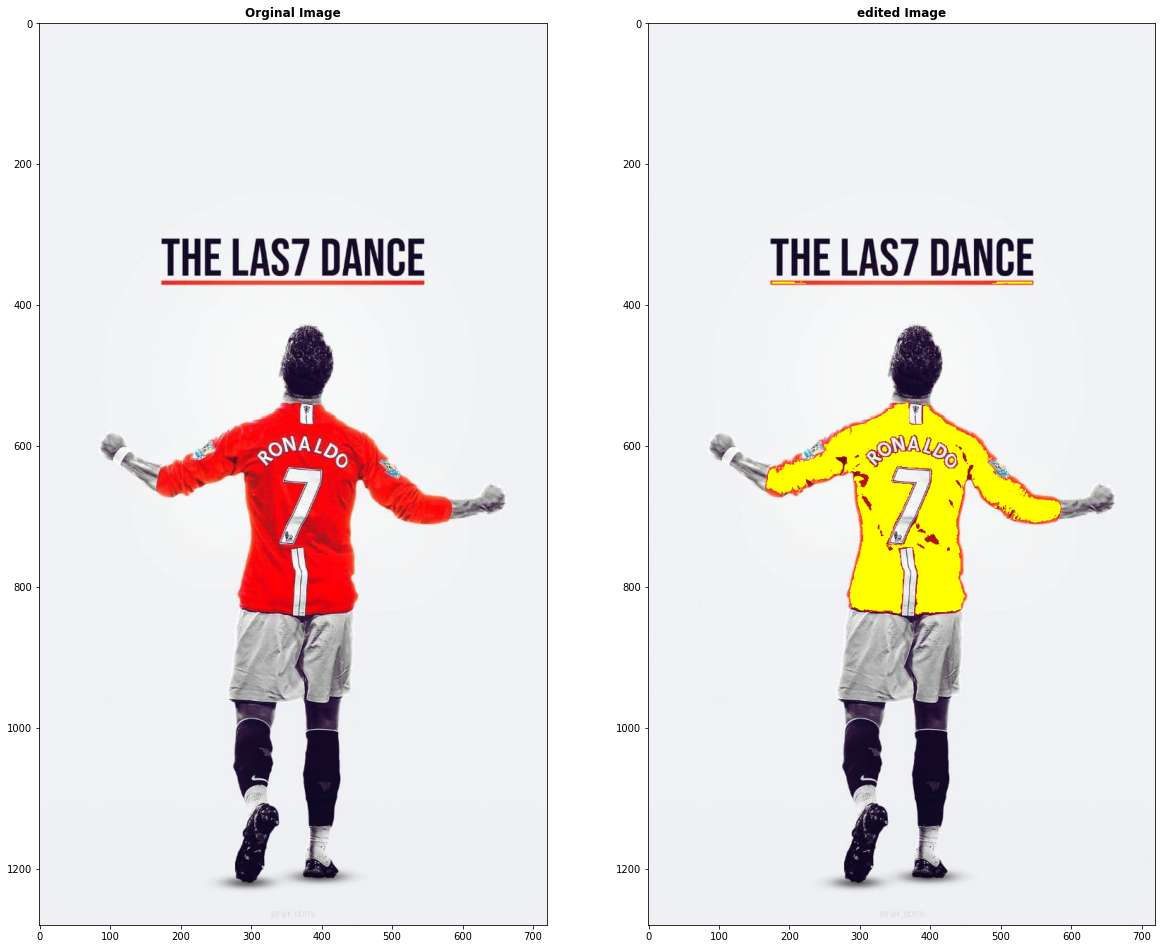

In [5]:
PhotoName = "./data/img2.png"
image = cv2.imread(PhotoName) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

rgb, hexcode = getColor(PhotoName)
print("selected color : ", rgb, hexcode)
color_change(image, 40, rgb)